In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Dataset/gender_classification_v7.csv')

In [ ]:
data.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [ ]:
data.describe()

long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000000                   0.000000  
50%       1.000000     0.000000                   0.000000  
75%       1.000000     1.000000                   1.000000  
max       1.000000     1.000000                   1.000000

In [ ]:
print(data.shape)

(5001, 8)


In [ ]:
X = data[data.columns[:7]]
y = data['gender']

In [ ]:
X.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  
0          1                          1  
1          1                          0  
2          1                          1  
3          1                          1  
4          0                          0

In [ ]:
y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

##**MinMax Normalization**

In [ ]:
K = X[['forehead_width_cm','forehead_height_cm']]

In [ ]:
K.head()

forehead_width_cm  forehead_height_cm
0               11.8                 6.1
1               14.0                 5.4
2               11.8                 6.3
3               14.4                 6.1
4               13.5                 5.9

In [ ]:
mink = K.min(axis=0)
maxk = K.max(axis=0)

In [ ]:
mink

forehead_width_cm     11.4
forehead_height_cm     5.1
dtype: float64

In [ ]:
X_scaled = (K - mink) / (maxk - mink)

In [ ]:
X_scaled.head()

forehead_width_cm  forehead_height_cm
0           0.097561                0.50
1           0.634146                0.15
2           0.097561                0.60
3           0.731707                0.50
4           0.512195                0.40

In [ ]:
X_scaled.columns

Index(['forehead_width_cm', 'forehead_height_cm'], dtype='object')

In [ ]:
X_scaled.rename(columns = {'forehead_width_cm':'forehead_width_cm_minmax', 'forehead_height_cm':'forehead_height_cm_minmax'}, inplace = True)

In [ ]:
X_scaled.head()

forehead_width_cm_minmax  forehead_height_cm_minmax
0                  0.097561                       0.50
1                  0.634146                       0.15
2                  0.097561                       0.60
3                  0.731707                       0.50
4                  0.512195                       0.40

**Combining the the dataset with MinMax Normalization Dataset**

In [ ]:
combineDatasetNormalization = X.join(X_scaled)

In [ ]:
combineDatasetNormalization.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  forehead_width_cm_minmax  \
0          1                          1                  0.097561   
1          1                          0                  0.634146   
2          1                          1                  0.097561   
3          1                          1                  0.731707   
4          0                          0                  0.512195   

   forehead_height_cm_minmax  
0                       0.50  
1                       0.15  
2                       0.60  
3                       0.50  
4                       0.40

##**Z-Score Normalization**

In [ ]:
meani = np.mean(K)
stdi = np.std(K)

In [ ]:
print(meani)
print(stdi)

forehead_width_cm     13.181484
forehead_height_cm     5.946311
dtype: float64
forehead_width_cm     1.107018
forehead_height_cm    0.541214
dtype: float64


In [ ]:
z_scored = (Kd - meani) / (stdi)

In [ ]:
z_scored.head()

forehead_width_cm  forehead_height_cm
0          -1.247933            0.283971
1           0.739389           -1.009418
2          -1.247933            0.653511
3           1.100720            0.283971
4           0.287725           -0.085568

In [ ]:
z_scored.rename(columns = {'forehead_width_cm':'forehead_width_cm_zscore', 'forehead_height_cm':'forehead_height_cm_zscore'}, inplace = True)

In [ ]:
meanafter = np.mean(z_scored)
stdafter = np.std(z_scored)

In [ ]:
print(meanafter)
print(stdafter)

forehead_width_cm_zscore    -1.224731e-15
forehead_height_cm_zscore    2.671106e-16
dtype: float64
forehead_width_cm_zscore     1.0
forehead_height_cm_zscore    1.0
dtype: float64


**Combining the Dataset with Z-Score Dataset**

In [ ]:
combineWithZscore = X.join(z_scored)

In [ ]:
combineWithZscore.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  forehead_width_cm_zscore  \
0          1                          1                 -1.247933   
1          1                          0                  0.739389   
2          1                          1                 -1.247933   
3          1                          1                  1.100720   
4          0                          0                  0.287725   

   forehead_height_cm_zscore  
0                   0.283971  
1                  -1.009418  
2                   0.653511  
3                   0.283971  
4                  -0.085568

##**Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

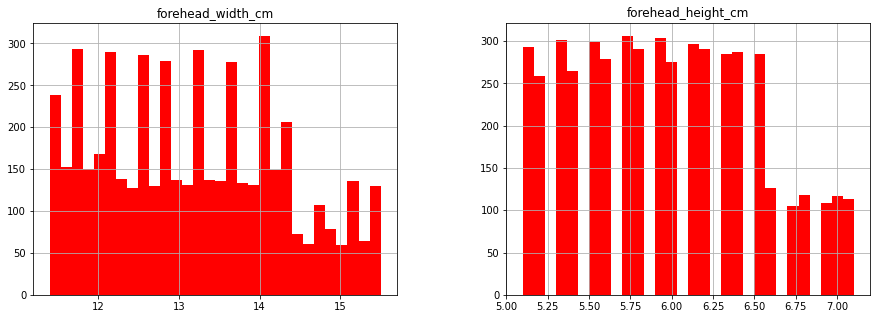

In [ ]:
K.hist(bins=30, figsize=(15, 5), color = "red")
plt.show()

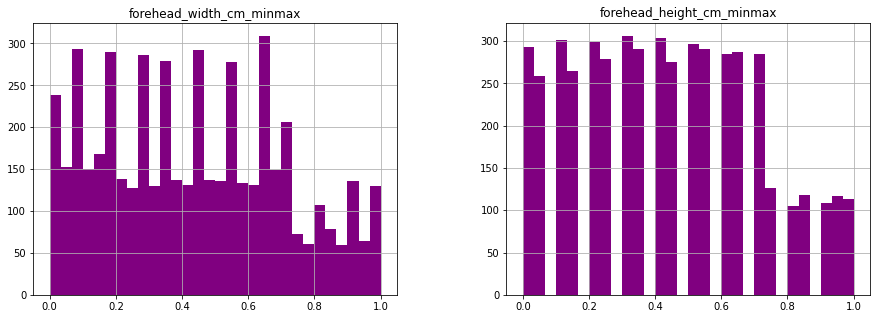

In [ ]:
X_scaled.hist(bins=30, figsize=(15, 5), color = "purple")
plt.show()

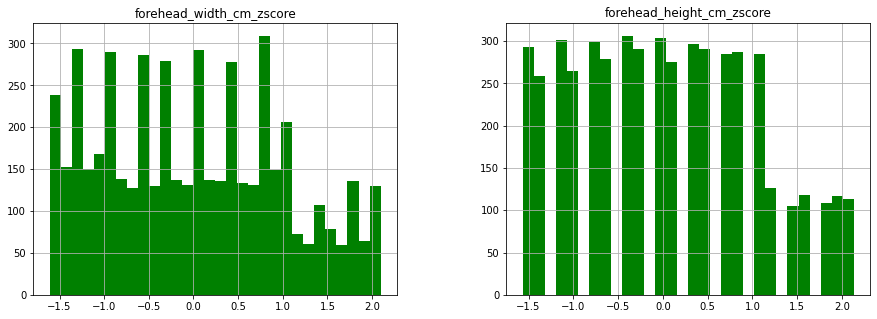

In [ ]:
z_scored.hist(bins=30, figsize=(15, 5), color = "green")
plt.show()

In [ ]:
minmaxvis = combineDatasetNormalization[['forehead_width_cm', 'forehead_width_cm_minmax', 'forehead_height_cm', 'forehead_height_cm_minmax']]

In [ ]:
minmaxvis = minmaxvis[:10]

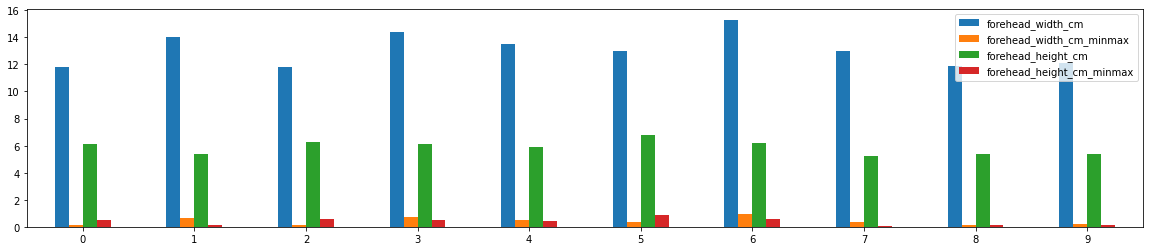

In [ ]:
plt.rcParams["figure.figsize"] = [20, 4]
minmaxvis.plot.bar(rot=0)

In [ ]:
zscorevis = combineWithZscore[['forehead_width_cm', 'forehead_width_cm_zscore', 'forehead_height_cm', 'forehead_height_cm_zscore']]

In [ ]:
zscorevis = zscorevis[:10]

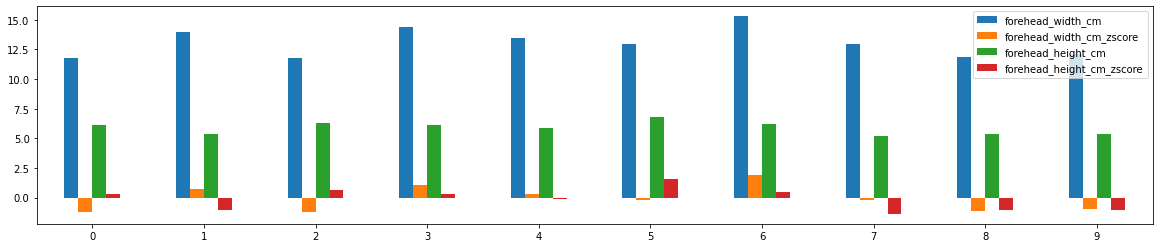

In [ ]:
plt.rcParams["figure.figsize"] = [20, 4]
zscorevis.plot.bar(rot=0)

In [ ]:
combineDatasetNormalization = combineDatasetNormalization.reset_index()

In [ ]:
combineDatasetNormalization.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  forehead_width_cm_minmax  \
0          1                          1                  0.097561   
1          1                          0                  0.634146   
2          1                          1                  0.097561   
3          1                          1                  0.731707   
4          0                          0                  0.512195   

   forehead_height_cm_minmax  
0                       0.50  
1                       0.15  
2                       0.60  
3                       0.50  
4                       0.40

In [ ]:
combineWithZscore = combineWithZscore.reset_index()

In [ ]:
combineWithZscore.head()

index  long_hair  forehead_width_cm  forehead_height_cm  nose_wide  \
0      0          1               11.8                 6.1          1   
1      1          0               14.0                 5.4          0   
2      2          0               11.8                 6.3          1   
3      3          0               14.4                 6.1          0   
4      4          1               13.5                 5.9          0   

   nose_long  lips_thin  distance_nose_to_lip_long  forehead_width_cm_zscore  \
0          0          1                          1                 -1.247933   
1          0          1                          0                  0.739389   
2          1          1                          1                 -1.247933   
3          1          1                          1                  1.100720   
4          0          0                          0                  0.287725   

   forehead_height_cm_zscore  
0                   0.283971  
1                  -1.009418  
2                   0.653511  
3                   0.283971  
4                  -0.085568

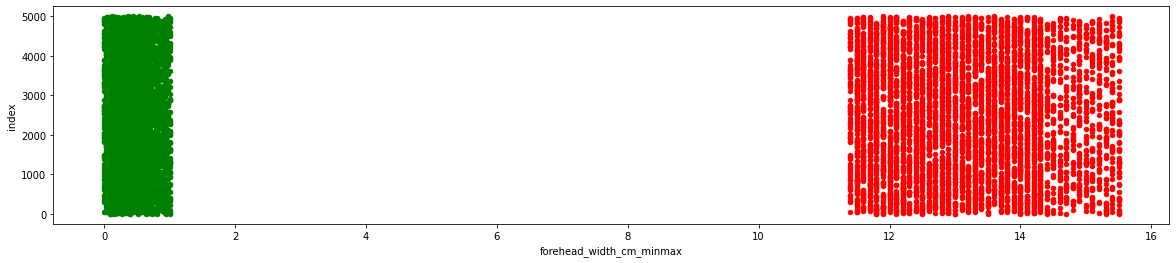

In [ ]:
ax1 = combineDatasetNormalization.plot(kind='scatter', x='forehead_width_cm', y='index', color='r')    
ax2 = combineDatasetNormalization.plot(kind='scatter', x='forehead_width_cm_minmax', y='index', color='g', ax=ax1)    

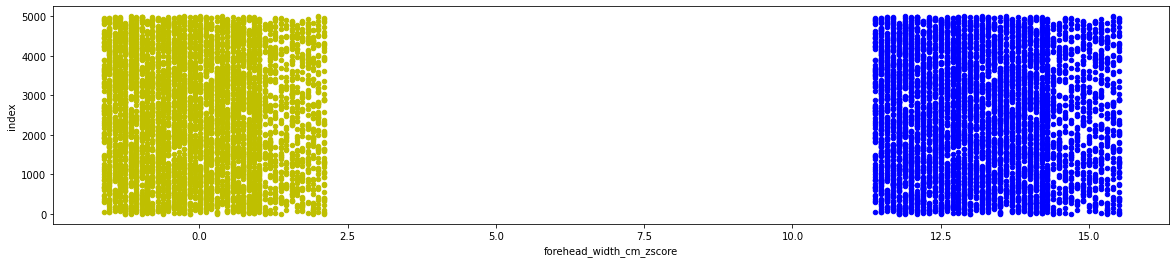

In [ ]:
ax1 = combineWithZscore.plot(kind='scatter', x='forehead_width_cm', y='index', color='b')    
ax2 = combineWithZscore.plot(kind='scatter', x='forehead_width_cm_zscore', y='index', color='y', ax=ax1) 